In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

Successfully created the directory yearGraphs 


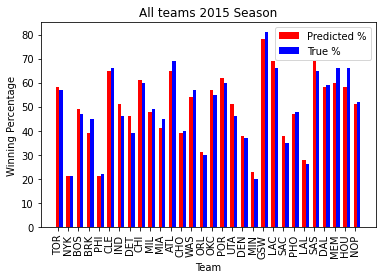

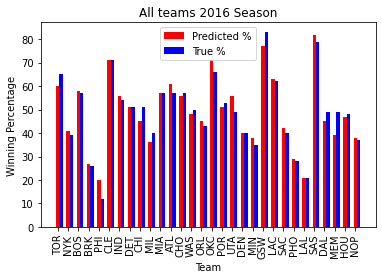

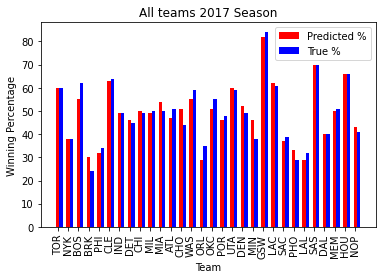

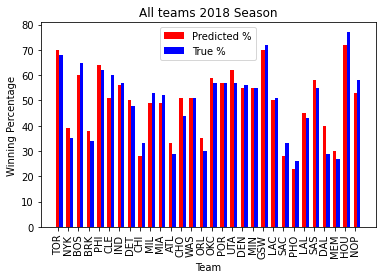

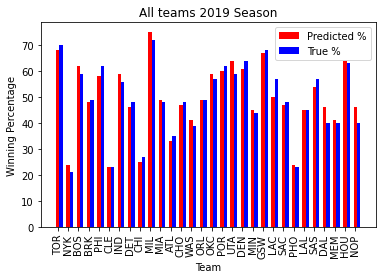

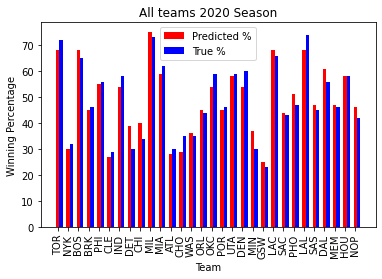

In [2]:
team_code = ['TOR','NYK','BOS','BRK','PHI','CLE','IND','DET','CHI','MIL','MIA','ATL','CHO','WAS','ORL','OKC','POR','UTA','DEN','MIN','GSW','LAC','SAC','PHO','LAL','SAS','DAL','MEM','HOU','NOP']
team_prediction = [0 for i in range(0,30)]
team_result = [0 for i in range(0,30)]
os.chdir('../grandTeamLogs')
path = "yearGraphs"
try:
    if not os.path.exists(path):
        os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
def pythagorean_expectation(scored, allowed):
    return round((scored**13.91/(allowed**13.91+scored**13.91))*100)
for x in range(15,21):
    os.chdir(str(x))
    for code in team_code:
        df = pd.read_csv('20'+ str(x) + '-' + code + '.csv')
        pts_scored = sum(df.pts)
        pts_allowed = sum(df.opp_pts)
        result = pythagorean_expectation(pts_scored, pts_allowed)
        team_prediction[team_code.index(code)] = result
        if df['wins'].iloc[-1] != df['wins'].max():
            team_result[team_code.index(code)] = round(((df['wins'].iloc[-1]+df['wins'].max())/df.shape[0])*100)
        else:
            team_result[team_code.index(code)] = round((df['wins'].iloc[-1]/df.shape[0])*100)
    ypos = np.arange(0,3*len(team_code),3)
    ypos2 = [i+1 for i in ypos]
    fig, ax = plt.subplots()
    plt.xticks(ypos, team_code)
    ax.bar(ypos, team_prediction,width=1,color='r',label="Predicted %")
    ax.bar(ypos2, team_result,width=1,color='b',label="True %")
    ax.set_xlabel('Team')
    ax.set_ylabel('Winning Percentage')
    plt.title('All teams 20'+ str(x) + ' Season')
    ax.legend()
    plt.xticks(rotation=90)
    # plt.rcParams['figure.figsize'] = [12, 8]
    # plt.rcParams['figure.dpi'] = 100
    plt.gcf().subplots_adjust(bottom=0.17)
    plt.show()
    os.chdir('../'+path)
    fig.savefig('ALLTEAM-20'+ str(x) +'.pdf')
    os.chdir('../')